In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# Estimation of annual forest land use change 
Data are from the Global Forest Watch project, which is stratified by a "threshold" value. Thresholds are percent tree cover of the cell as of 2000. Data were obtained from the Global Forest Watch "Dashboard" on June 1, 2020. URL: https://www.globalforestwatch.org/


In [2]:
tc_loss_df = pd.read_excel('data/060120_deforestation_global_gfw.xlsx', sheet_name='Country tree cover loss')
tc_loss_df.head()

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000_2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018
0,Afghanistan,10,64385715,432115,126247,304,92,190,253,207,...,74,94,116,41,2,4,0,0,0,28
1,Afghanistan,15,64385715,302660,106867,304,91,186,247,205,...,73,92,114,40,2,3,0,0,0,28
2,Afghanistan,20,64385715,284357,105733,304,89,180,245,203,...,71,88,114,40,2,3,0,0,0,28
3,Afghanistan,25,64385715,254867,72395,304,89,180,245,202,...,71,88,114,39,1,3,0,0,0,27
4,Afghanistan,30,64385715,205791,71797,304,88,179,244,201,...,70,88,113,39,1,3,0,0,0,26


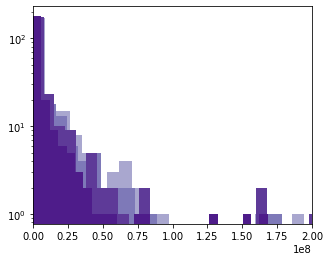

In [3]:
# Plotting the distribution of tree-cover extent (per country) as a function of the threshold. 
# This shows pretty clearly that tree cover is non-uniform, but this is a pretty bad means of presenting this data.
# Will use a figure from Hansen 2013 instead.
plt.figure(figsize=(5, 4))
pal = sns.color_palette('Purples', n_colors=10)
plt.yscale('log')

for i, (thresh, gdf) in enumerate(tc_loss_df.groupby('threshold')):
    if thresh % 10 != 0:
        continue
        
    plt.hist(gdf.extent_2000_ha, color=pal[i+4], bins=100)

plt.xlim(0, 2e8)
plt.show()

In [4]:
cols = tc_loss_df.columns[6:].values.tolist()
years = [int(c.split('_')[-1]) for c in cols]

tc_loss_by_threshold = tc_loss_df.groupby('threshold').sum()

# Make a datafram with the aggregate data columns for safe keeping.
sub_df = tc_loss_by_threshold[tc_loss_by_threshold.columns[:3]].copy()
sub_df['area_km2'] = sub_df.area_ha.values / 100
sub_df['extent_2000_km2'] = sub_df.extent_2000_ha.values / 100
sub_df['extent_2010_km2'] = sub_df.extent_2010_ha.values / 100
sub_df['pct_cov_2000'] = sub_df.extent_2000_ha.values / sub_df.area_ha.values
sub_df['pct_cov_2010'] = sub_df.extent_2010_ha.values / sub_df.area_ha.values

sub_df.to_csv('data/060120_gfw_threshold_metadata.csv')
sub_df

# Notice below that about 30% of Earth surface is calculated as forested (e.g. see 25% threshold).
# This is consistent with gross estimates e.g. from this NASA publication. 
# https://earthobservatory.nasa.gov/features/ForestCarbon#:~:text=Forests%20cover%2030%20percent%20of%20the%20Earth's%20land.

# Also notice that the total area considered is 1.3e8 km^2, which is about 15% less than the surface area of Earth.
# The data is subdivided by country and excludes Antarctida. The area of Antarctica (1.4e7 km^2) makes up almost
# all of this difference, being about 10% of the land surface area. So this is all consistent. 

,area_ha,extent_2000_ha,extent_2010_ha,area_km2,extent_2000_km2,extent_2010_km2,pct_cov_2000,pct_cov_2010
threshold,,,,,,,,
10,13274339993,4852446548,4761357989,1.327434e+08,48524465.48,47613579.89,0.365551,0.358689
15,13274339993,4537726330,4457264259,1.327434e+08,45377263.30,44572642.59,0.341842,0.335780
20,13274339993,4259353502,4193839481,1.327434e+08,42593535.02,41938394.81,0.320871,0.315936
25,13274339993,4164079414,4103144787,1.327434e+08,41640794.14,41031447.87,0.313694,0.309103
30,13274339993,3993347476,3923636238,1.327434e+08,39933474.76,39236362.38,0.300832,0.295581
50,13274339993,3299280877,3175688626,1.327434e+08,32992808.77,31756886.26,0.248546,0.239235
75,13274339993,2362098640,2267096399,1.327434e+08,23620986.40,22670963.99,0.177945,0.170788


In [5]:
# Make a data frame of annual tree-cover loss broken down by tree cover % threshold as 2000. 
tc_loss_by_threshold.reset_index(inplace=True)
melted_loss_by_threshold = pd.melt(tc_loss_by_threshold, id_vars=['threshold'], value_vars=cols, var_name='year', value_name='tc_loss_ha')
melted_loss_by_threshold.replace(dict(zip(cols, years)), inplace=True)

melted_loss_by_threshold.to_csv('data/060120_tc_loss_ha_by_threshold.csv')
melted_loss_by_threshold

,threshold,year,tc_loss_ha
0,10,2001,14178845
1,15,2001,13963942
2,20,2001,13691145
3,25,2001,13576718
4,30,2001,13354449
...,...,...,...
121,20,2018,25889841
122,25,2018,25498398
123,30,2018,24750173
124,50,2018,20600825


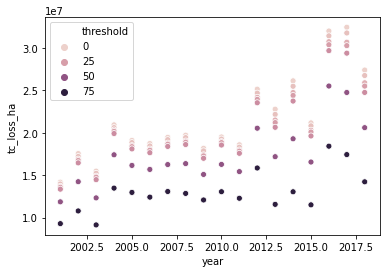

In [6]:
sns.scatterplot(data=melted_loss_by_threshold, x='year', y='tc_loss_ha', hue='threshold')

In [7]:
co2_emissions_df = pd.read_excel('data/060120_deforestation_global_gfw.xlsx', sheet_name='Country co2 emissions')
co2_emissions_df.head()

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,co2_stock_2000_Mt,co2_emissions_Mt_2001,co2_emissions_Mt_2002,co2_emissions_Mt_2003,co2_emissions_Mt_2004,...,co2_emissions_Mt_2009,co2_emissions_Mt_2010,co2_emissions_Mt_2011,co2_emissions_Mt_2012,co2_emissions_Mt_2013,co2_emissions_Mt_2014,co2_emissions_Mt_2015,co2_emissions_Mt_2016,co2_emissions_Mt_2017,co2_emissions_Mt_2018
0,Afghanistan,10,64385715,432115,126247,84.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,15,64385715,302660,106867,64.63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,20,64385715,284357,105733,61.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,25,64385715,254867,72395,56.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,30,64385715,205791,71797,48.41,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
co2_emissions_df.groupby('threshold').sum()

,area_ha,extent_2000_ha,extent_2010_ha,co2_stock_2000_Mt,co2_emissions_Mt_2001,co2_emissions_Mt_2002,co2_emissions_Mt_2003,co2_emissions_Mt_2004,co2_emissions_Mt_2005,co2_emissions_Mt_2006,...,co2_emissions_Mt_2009,co2_emissions_Mt_2010,co2_emissions_Mt_2011,co2_emissions_Mt_2012,co2_emissions_Mt_2013,co2_emissions_Mt_2014,co2_emissions_Mt_2015,co2_emissions_Mt_2016,co2_emissions_Mt_2017,co2_emissions_Mt_2018
threshold,,,,,,,,,,,,,,,,,,,,,
10,13274339993,4852446548,4761357989,1228876.58,2408.44,2811.38,2281.01,3130.59,3205.93,2952.26,...,3368.70,3443.68,2957.23,3917.15,3162.77,4370.08,3588.74,6163.82,5588.86,4332.67
15,13274339993,4537726330,4457264259,1202638.94,2400.10,2800.45,2273.30,3119.72,3191.71,2938.72,...,3349.58,3429.19,2942.88,3897.36,3137.93,4343.04,3570.34,6140.27,5554.27,4305.40
20,13274339993,4259353502,4193839481,1173981.08,2383.93,2780.84,2254.28,3101.07,3164.15,2911.58,...,3305.95,3403.28,2913.22,3856.10,3081.48,4281.44,3526.65,6082.74,5453.30,4227.84
25,13274339993,4164079414,4103144787,1163941.28,2379.25,2775.39,2249.29,3095.62,3157.96,2904.73,...,3297.38,3396.34,2906.04,3845.81,3066.77,4263.49,3512.75,6063.14,5426.61,4207.09
30,13274339993,3993347476,3923636238,1144715.01,2367.54,2761.78,2236.51,3082.67,3139.96,2887.88,...,3272.71,3378.20,2887.02,3820.41,3022.73,4209.47,3471.35,6003.60,5340.35,4140.34
50,13274339993,3299280877,3175688626,1060627.95,2281.34,2661.56,2147.08,2987.35,3027.26,2775.70,...,3122.56,3229.39,2750.27,3645.32,2806.65,3915.18,3246.60,5687.76,4954.17,3829.71
75,13274339993,2362098640,2267096399,893337.47,2012.37,2350.08,1893.87,2719.49,2747.11,2477.25,...,2733.87,2825.92,2413.61,3209.94,2279.42,3165.27,2644.58,4848.16,4033.25,3096.70
